# **First Mini-Project**

### Massive Graph Management and Analytics

---


---

#### **Authors:** Benjamin Gold & Dilbar Isakova
#### **Professor:** Nacera Seghuoani

In [1]:
import time
import numpy as np
import tracemalloc
import collections
import networkx as nx
import sys, collections
import matplotlib.pyplot as plt
from collections import defaultdict
from community import community_louvain
from networkx.algorithms.community import girvan_newman
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score as nmi

# **Part 1**

### **Question 1**

First of all, the matrix multiplication doesn't work because the dimensions of the identity matrix do not match the previous matrices. Let's then just look at the first two matrices.

In [2]:
q1matrix1 = np.array([[-1, 3/2],
                     [1, -1]])
q1matrix2 = np.array([[-1, 3/2],
                     [2/3, -1]])
print(np.linalg.det(q1matrix1))
print(np.linalg.det(q1matrix2))
q1matrixmul = q1matrix1 @ q1matrix2
print(q1matrixmul)
print(np.linalg.det(q1matrixmul))

-0.5
0.0
[[ 2.         -3.        ]
 [-1.66666667  2.5       ]]
0.0


What we notice is that the first matrix is invertible, while the second matrix is singular. Then, when we multiply an invertible matrix and a singular matrix, we get a singular matrix.

### **Question 2:** Show that $A^n = XΛ^n X^{-1}$

We start with the fact that $A = XΛX^1$. This is n=1. Consider n=2. We have $(XΛ^n X^{-1})(XΛ^n X^{-1})$. The multiplication of X and $X^{-1}$ is equal to 1 due to the properties of invertible matrices. Thus, by canceling we get (Λ)(Λ) = $Λ^2$. By induction, we see that $A^n = XΛ^n X^{-1}$.

### **Question 3:** Find the eigenvalues and unit eigenvectors of A^TA and AA^T

In [3]:
q3matrix = np.array([[1,1],
                     [1,0]])
q3matrixt = q3matrix.transpose()
q3matrixm1 = q3matrixt @ q3matrix
eigenvalues, eigenvectors = np.linalg.eig(q3matrixm1)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
print()
q3matrixm2 = q3matrix @ q3matrixt
eigenvalues, eigenvectors = np.linalg.eig(q3matrixm2)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
print()

Eigenvalues:
[2.61803399 0.38196601]
Eigenvectors:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]

Eigenvalues:
[2.61803399 0.38196601]
Eigenvectors:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]



### **Question 6:** Show that if λ₁, λ₂, ..., λₙ are the eigenvalues of a matrix A, then Aᵐ has eigenvalues λ₁ᵐ, λ₂ᵐ, ..., λₙᵐ.

To prove the above condition we need to follow the next steps:

- Let  **A**  be a square matrix, and let  **v**  be an eigenvector of  **A**
 corresponding to the eigenvalue  **λ**.

By definition:

### **Av = λv**

- Then we need to apply  **A²**:

So, we multiplied both sides of the equation by  **A**:


### **=> A²v = A(Av) = A(λv) = λ(Av) = λ(λv) = λ²v**

### **=> A²v = λ²v.**

And, we should generalize to **Aᵐ**: By induction, for any positive integer **m**:
### **Aᵐv = λᵐv.**



---


Summary:

1. It hows that **λᵐ** is the eigenvalue of **Aᵐ**, corresponding to the same eigenvector **v**.
2. Repeating this for all eigenvalues **λ₁, λ₂, ..., λₙ**
3. We can conclude that the eigenvalues of **Aᵐ** are **λ₁ᵐ, λ₂ᵐ, ..., λₙᵐ.**


### **Question 8**: For an undirected graph both the adjacency matrix and the Laplacian matrix are symmetric. Show that Laplacian is positive semi-definite matrix. Show that Laplacian has 0 is an eigenvalue (the smallest one).

#### **Part 1: Laplacian is Positive Semi-Definite**

##### Showing Positive Semi-Definiteness:

Consider the expression $( x^T L x $), where $( L = D - A $):

$[
x^T L x = x^T (D - A) x = x^T D x - x^T A x
$]

Let's break this down:
1. **Term 1: $( x^T D x $)**: Since \( D \) is diagonal with $( D_{ii} = \text{deg}(i) $), we have:
   $[
   x^T D x = \sum_{i=1}^{n} \text{deg}(i) x_i^2
   $]
   This is a sum of non-negative terms, so $( x^T D x \geq 0 $).

2. **Term 2: $( x^T A x $)**: This is a quadratic form with the adjacency matrix \( A \). We can express it as:
   $[
   x^T A x = \sum_{i,j} A_{ij} x_i x_j
   $]
   Since $( A_{ij} = 1 $) if there is an edge between nodes \( i \) and \( j \) (and 0 otherwise), this term represents the sum of the products of \( x_i \) and \( x_j \) for pairs of nodes that are connected by an edge.

Now, let's combine these terms:

$[
x^T L x = \sum_{i=1}^{n} \text{deg}(i) x_i^2 - \sum_{(i,j) \in E} (x_i - x_j)^2
$]

The second term is always non-positive because the square of any real number is non-negative, and it’s subtracted from the first term. Thus, we have:

$[
x^T L x = \sum_{i=1}^{n} \text{deg}(i) x_i^2 - \sum_{(i,j) \in E} (x_i - x_j)^2 \geq 0
$]

Hence, $( x^T L x \geq 0 $) for all \( x \), proving that the Laplacian matrix \( L \) is **positive semi-definite**.


---



#### **Part 2: Zero is an Eigenvalue of the Laplacian**

We now want to show that the Laplacian matrix has \( 0 \) as an eigenvalue. To do this, we will show that the Laplacian matrix always has a non-trivial eigenvector corresponding to the eigenvalue \( 0 \).

##### Eigenvalue \( 0 \):

Recall that for an eigenvalue $( \lambda $) and eigenvector \( v \), the following equation holds:

$[
L v = \lambda v
$]

Now, consider the vector $( v = \mathbf{1} $) (the vector of all ones). Let's compute $( L \mathbf{1} $):

$[
L \mathbf{1} = (D - A) \mathbf{1}
$]

We know that \( D \) is the degree matrix, and each row of \( D \) sums to the degree of the corresponding node. Hence:

$[
D \mathbf{1} = \text{degree of node 1}, \text{degree of node 2}, \dots, \text{degree of node n}
$]

So, each entry of $( D \mathbf{1} $) is the degree of the corresponding node. Now consider $( A \mathbf{1} $). Since \( A \) is the adjacency matrix, each row of \( A \) represents the neighbors of a node, and the sum of the entries in each row is equal to the degree of the corresponding node. Hence:

$[
A \mathbf{1} = \text{degree of node 1}, \text{degree of node 2}, \dots, \text{degree of node n}
$]

Thus, we have:

$[
L \mathbf{1} = (D - A) \mathbf{1} = \mathbf{0}
$]

This shows that $( \mathbf{1} $) is an eigenvector of \( L \) corresponding to the eigenvalue \( 0 \).



---



##### **Conclusion:**

Since $( L \mathbf{1} = 0 $), it follows that \( 0 \) is an eigenvalue of the Laplacian matrix. The corresponding eigenvector is $( \mathbf{1} $) (the vector of all ones), which is non-trivial. Therefore, the Laplacian matrix always has \( 0 \) as an eigenvalue, and it is the **smallest** eigenvalue.

#### **Summary:**
- The Laplacian matrix \( L = D - A \) of an undirected graph is **positive semi-definite**, as $( x^T L x \geq 0 $) for all vectors \( x \).
- The Laplacian matrix always has \( 0 \) as an eigenvalue, with the corresponding eigenvector being the vector of all ones $( \mathbf{1} $). This eigenvalue is the smallest eigenvalue of \( L \).

# **Part 2**

Comparison between basic random walk and lazy random walk (with formalization) and/or page rank and Hits algorithms (with formalization) and/or one or more example of specific graphs where the expected hitting probability/time could be shown easily.

We will make a simple graph and a slightly more complicated graph for visualizations in parts 2 and 3.

In [4]:
# Define a sample graph
G = nx.DiGraph()
edges = [(1, 2), (2, 3), (3, 4), (4, 1), (1, 3), (3, 2)]
G.add_edges_from(edges)

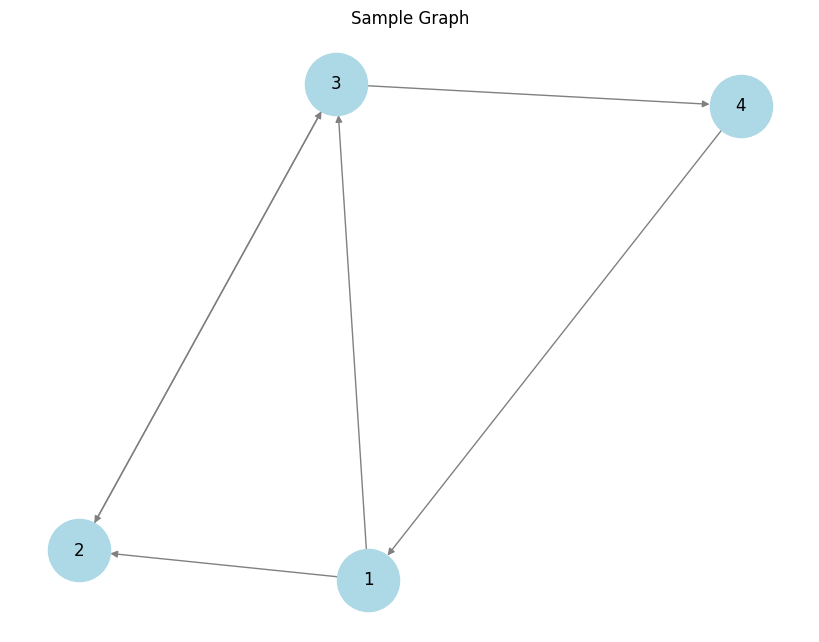

In [5]:
# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2000, edge_color="gray")
plt.title("Sample Graph")
plt.show()

In [6]:
# Basic Random Walk Transition Matrix
def random_walk_matrix(graph):
    A = nx.adjacency_matrix(graph).toarray()
    D = np.diag(A.sum(axis=1))  # Degree matrix
    return np.linalg.inv(D) @ A

### Random Walk

In [7]:
P_rw = random_walk_matrix(G)
print("Basic Random Walk Transition Matrix:")
print(P_rw)

Basic Random Walk Transition Matrix:
[[0.  0.5 0.5 0. ]
 [0.  0.  1.  0. ]
 [0.  0.5 0.  0.5]
 [1.  0.  0.  0. ]]


### **Basic Random Walk Formalization:**

A **random walk** on a graph can be modeled as a stochastic process where the state transitions from one node to another based on the adjacency structure of the graph. For a given directed graph \( G = (V, E) \), where \( V \) is the set of vertices (nodes) and \( E \) is the set of edges, the **transition probability** from node \( i \) to node \( j \) is given by:

\[
$P(i, j) = \frac{A_{ij}}{d_i}$
\]

*Where:*
- $( A_{ij} )$ is the element of the adjacency matrix \( A \) at row \( i \), column \( j \), representing the presence of an edge from node \( i \) to node \( j \) (i.e., \( A_{ij} = 1 \) if there is an edge, and \( A_{ij} = 0 \) otherwise),
- $( d_i = \sum_j A_{ij} $) is the **degree** of node \( i \), which represents the number of outgoing edges from node \( i \).

Thus, the probability of transitioning from node \( i \) to node \( j \) is proportional to the number of outgoing edges from node \( i \), ensuring that the sum of all probabilities for node \( i \) is 1.

#### **Transition Matrix:**

The **transition matrix** $( P_{\text{RW}} $) is constructed as follows:
$[
P_{\text{RW}} = D^{-1} A
$]
*Where:*
- \( A \) is the **adjacency matrix** of the graph,
- \( D \) is the **degree matrix**, which is a diagonal matrix where the diagonal entries \( D_{ii} \) are the out-degrees of each node, i.e., $( D_{ii} = \sum_j A_{ij} $).

In [8]:
# Lazy Random Walk Transition Matrix
def lazy_random_walk_matrix(graph, p=0.15):
    A = nx.adjacency_matrix(graph).toarray()
    D = np.diag(A.sum(axis=1))  # Degree matrix
    P = np.linalg.inv(D) @ A
    # Lazy random walk: P_LRW = p * I + (1 - p) * P_RW
    return p * np.eye(len(P)) + (1 - p) * P

In [9]:
P_lrw = lazy_random_walk_matrix(G)
print("\nLazy Random Walk Transition Matrix (p=0.15):")
print(P_lrw)


Lazy Random Walk Transition Matrix (p=0.15):
[[0.15  0.425 0.425 0.   ]
 [0.    0.15  0.85  0.   ]
 [0.    0.425 0.15  0.425]
 [0.85  0.    0.    0.15 ]]


### **Lazy Random Walk (Formalization)**:

In the lazy random walk, a node \( i \) moves to a neighboring node or stays at node \( i \) with a probability \( p \). This means that the transition matrix ( $P_{{LRW}}$ ) is a weighted sum of the basic random walk matrix \( $P_{{RW}}$ \) and the identity matrix \( I \), where the identity matrix represents the stay probability.

The formalization for the Lazy Random Walk transition matrix is:

\[
$P_{{LRW}}$ = pI + (1 - p)$P_{{RW}}$
\]

Where:
- \( I \) is the identity matrix (representing the stay probability),
- \( $P_{{RW}}$ \) is the basic random walk transition matrix,
- \( p \) is the probability of staying at the current node.

In [10]:
# PageRank
pagerank = nx.pagerank(G, alpha=0.85)
print("\nPageRank Scores:")
print(pagerank)


PageRank Scores:
{1: 0.19557861112876537, 2: 0.26909493789908445, 3: 0.3493521357413458, 4: 0.1859743152308042}


### **Formalization of PageRank**:

PageRank is an algorithm that ranks nodes (or web pages) based on their relative importance in a directed graph. It was originally developed by Google to rank web pages in search results. The central idea is that a node is important if it is pointed to by other important nodes.

#### **Mathematical Formalization:**

Let \( G = (V, E) \) be a directed graph, where \( V \) is the set of vertices (nodes) and \( E \) is the set of directed edges. The **PageRank** of each node can be computed iteratively using the following formula:

$[
r_i = \frac{1 - \alpha}{N} + \alpha \sum_{j \in \text{In}(i)} \frac{r_j}{d_j}
$]

*Where:*

- \( r_i \) is the PageRank score of node \( i \),
- \( \alpha \) is the damping factor (usually set to 0.85, representing the probability that a random surfer continues clicking on links),
- \( N \) is the total number of nodes in the graph (the normalization factor),
- $( \text{In}(i) $) is the set of nodes that have directed edges to node \( i \) (i.e., the set of nodes pointing to \( i \)),
- \( d_j \) is the out-degree of node \( j \) (the number of outgoing edges from node \( j \)).

This equation means that the PageRank of a node is a weighted sum of the PageRank scores of the nodes that point to it, divided by their out-degrees. The term \( \frac{1 - \alpha}{N} \) represents the probability that the random walker jumps to any node (i.e., a random teleportation).

### **Transition Matrix and Iterative Method:**

The PageRank algorithm can be formulated as a system of linear equations:

$[
r = \alpha P r + \frac{1 - \alpha}{N} \mathbf{1}
$]

*Where:*

- \( r \) is the vector of PageRank scores,
- \( P \) is the transition matrix (same as the one used in random walks),
- $( \mathbf{1} $) is a column vector of all ones (indicating the uniform distribution of teleportation),
- \( \alpha \) is the damping factor.

#### **Iterative Computation:**

The PageRank score of each node is computed iteratively by the following process:
1. Start with an initial guess for the PageRank scores (e.g., set all scores equal to 1).
2. Update the PageRank score of each node using the formula.
3. Normalize the scores so they sum to 1.
4. Repeat the update process until the scores converge (the changes between iterations become very small).

### **PageRank in Python (with `networkx`):**

The Python implementation using `networkx` calculates the PageRank scores using an iterative method. The function `nx.pagerank` does this by solving the above equation iteratively with the damping factor \( \alpha \).

Here's the formalization within your Python code:

### **Key Components of the PageRank Formula:**

1. **Damping Factor \( \alpha \)**: The damping factor controls the influence of the random jump. A value of \( \alpha = 0.85 \) is typically used, meaning that there’s an 85% chance the random walker continues following links, and a 15% chance they randomly jump to a new node.

2. **Transition Matrix \( P \)**: The transition matrix \( P \) describes the probabilities of transitioning from one node to another in a random walk. This is similar to the random walk model we discussed earlier.

3. **Normalization**: The PageRank scores are typically normalized so that their sum is equal to 1, ensuring that the scores represent probabilities.

In [11]:
# HITS
hits = nx.hits(G)
print("\nHITS Scores:")
print("Authorities:", hits[0])
print("Hubs:", hits[1])


HITS Scores:
Authorities: {1: 0.44504186791262884, 2: 0.1980622641951617, 3: 0.3568958678922096, 4: -7.441283228224161e-17}
Hubs: {1: -1.3408729051748762e-16, 2: 0.44504186791262895, 3: 0.3568958678922094, 4: 0.19806226419516185}


### **HITS Algorithm (Formalization)**:

The HITS algorithm calculates two sets of scores for each node in the graph: **Authority** scores and **Hub** scores.

- **Authority** score of a node \( i \): Measures how much it is linked by good hubs (i.e., other nodes with high hub scores).
- **Hub** score of a node \( i \): Measures how many good authorities it links to (i.e., nodes with high authority scores).

The formalization of the HITS algorithm involves solving for two vectors: the **Authority** vector \( a \) and the **Hub** vector \( h \).

The iterative update rules are as follows:

\[
a = $M^T$ h
\]

\[
h = M a
\]

Where:
- \( M \) is the adjacency matrix of the graph (if directed, \( $M_{ij}$ = 1 \) if there's an edge from node \( j \) to node \( i \)),
- \( a \) is the **Authority** vector,
- \( h \) is the **Hub** vector.

The algorithm iterates until convergence, normalizing the authority and hub scores in each step.

### Key Idea Behind HITS:
The **HITS (Hyperlink-Induced Topic Search)** algorithm aims to find two important types of nodes in a directed graph:
1. **Hub nodes**: These are nodes that point to many other nodes that are considered "authorities."
2. **Authority nodes**: These are nodes that are pointed to by many "good" hubs.

The main concept here is that:
- **A good hub** is one that points to many **good authorities**.
- **A good authority** is one that is pointed to by many **good hubs**.

### The Non-Circular Formalization:
While the definitions of hubs and authorities are related, they are not circular. The key is that **hubs** and **authorities** are updated iteratively in the HITS algorithm, with the following process:

- **Authority score**: The authority score of a node is determined by the **sum** of the hub scores of the nodes that point to it.
  $[
  \text{Authority score of node } i = \sum_{j \in \text{In}(i)} \text{Hub score of node } j
  $]
  Where $( \text{In}(i) $) represents the set of nodes that point to node \( i \).

- **Hub score**: The hub score of a node is determined by the **sum** of the authority scores of the nodes it points to.
  $[
  \text{Hub score of node } j = \sum_{i \in \text{Out}(j)} \text{Authority score of node } i
  $]
  Where $( \text{Out}(j) $) represents the set of nodes that node \( j \) points to.

### Iterative Updates:
- We initialize the hub and authority scores arbitrarily (e.g., set them all to 1).
- Then, we iteratively update the scores as follows:
  - Update the authority scores by summing the hub scores of the nodes that point to each node.
  - Update the hub scores by summing the authority scores of the nodes each node points to.

After updating, the scores are typically normalized (so that the sum of each vector is 1 or the maximum value is 1), and the process is repeated until the scores converge.

In [12]:
def compute_hitting_time(G, start, target):
    """
    Compute the expected hitting time from start to target in a directed graph.

    Parameters:
        G (nx.DiGraph): Directed graph.
        start: Start node.
        target: Target node.

    Returns:
        float: Expected hitting time from start to target.
    """
    nodes = list(G.nodes())
    n = len(nodes)
    node_to_index = {node: i for i, node in enumerate(nodes)}
    start_idx, target_idx = node_to_index[start], node_to_index[target]

    # Build transition probability matrix
    P = np.zeros((n, n))
    for node in nodes:
        neighbors = list(G.successors(node))
        if neighbors:
            prob = 1 / len(neighbors)
            for neighbor in neighbors:
                P[node_to_index[node], node_to_index[neighbor]] = prob

    # Exclude target node to form the system of equations
    indices = [i for i in range(n) if i != target_idx]
    A = np.eye(len(indices)) - P[np.ix_(indices, indices)]
    b = np.ones(len(indices))

    # Solve the linear system
    h = np.linalg.solve(A, b)
    return h[indices.index(start_idx)]

In [13]:
start_node = 1
target_node = 4

hitting_time = compute_hitting_time(G, start_node, target_node)
print(f"Expected hitting time from node {start_node} to node {target_node}: {hitting_time}")

Expected hitting time from node 1 to node 4: 4.5


# **Part 3**

Study and analyse different centrality measures to show the comparison and their relevance according to the experimented graphs.

#### **Graph Generation:**

- We generated an Erdős-Rényi random graph using **nx.erdos_renyi_graph()**, which gives a graph with **25 nodes** and an **edge probability of 0.15.**
- **Note:** it can be replaced with any other graph type, such as a scale-free or small-world graph.

In [14]:
# Generate a sample graph
G = nx.erdos_renyi_graph(25, 0.15)  # Erdős-Rényi random graph

#### **Centrality Measures:**

- **Degree Centrality:** measures the number of edges connected to a node, normalized by the maximum possible number of edges.
The formula for **Degree Centrality** is:
$[
C_D(v) = \frac{\text{deg}(v)}{n-1}
$]
Where:
- $( \text{deg}(v) $): Number of edges connected to node $( v $).
- $( n $): Total number of nodes in the graph.


- **Betweenness Centrality:** measures how often a node appears on the shortest path between two other nodes.
The formula for **Betweenness Centrality** is:
$[
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$]
Where:
- $( \sigma_{st} $): Total number of shortest paths between nodes \( s \) and \( t \).
- $( \sigma_{st}(v) $): Number of those shortest paths that pass through \( v \).

- **Closeness Centrality:** measures how close a node is to all other nodes in the graph, by calculating the inverse of the average shortest path distance.
The formula for **Closeness Centrality** is:
$[
C_C(v) = \frac{1}{\sum_{u \in V} d(v, u)}
$]
Where:
- $( d(v, u) $): Shortest path distance between node \( v \) and node \( u \).
- $( n $): Total number of nodes in the graph.

- **Eigenvector Centrality:** measures the influence of a node based on the influence of its neighbors, considering both direct and indirect connections.
The formula for **Eigenvector Centrality** is:
$[
C_E(v) = \frac{1}{\lambda} \sum_{u \in N(v)} A_{ij} C_E(u)
$]
Where:
- $( C_E(v) $): Eigenvector centrality of node \( v \).
- $( N(v) $): Set of neighbors of \( v \).
- $( \lambda $): Eigenvalue corresponding to the eigenvector.

This formula comes from solving the eigenvector equation:
$[
A x = \lambda x
$]
Where \( A \) is the adjacency matrix of the graph, and \( x \) is the eigenvector representing the centralities.

In [15]:
# Degree Centrality: Proportion of neighbors
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality: The number of shortest paths that pass through a node
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality: The inverse of the average shortest path length from a node
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector Centrality: A measure of the influence of a node in a network
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [16]:
# Display centrality measures for comparison
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree Centrality: {0: 0.16666666666666666, 1: 0.125, 2: 0.041666666666666664, 3: 0.25, 4: 0.125, 5: 0.16666666666666666, 6: 0.041666666666666664, 7: 0.16666666666666666, 8: 0.08333333333333333, 9: 0.29166666666666663, 10: 0.29166666666666663, 11: 0.125, 12: 0.16666666666666666, 13: 0.125, 14: 0.16666666666666666, 15: 0.125, 16: 0.041666666666666664, 17: 0.08333333333333333, 18: 0.08333333333333333, 19: 0.041666666666666664, 20: 0.041666666666666664, 21: 0.125, 22: 0.041666666666666664, 23: 0.125, 24: 0.20833333333333331}
Betweenness Centrality: {0: 0.1404761904761905, 1: 0.028698475437605876, 2: 0.0, 3: 0.1695958027479767, 4: 0.029799548277809146, 5: 0.05853174603174603, 6: 0.0, 7: 0.02942546583850932, 8: 0.0, 9: 0.3041243177112743, 10: 0.2688068573938139, 11: 0.03172328878850618, 12: 0.1847826086956522, 13: 0.042877533094924404, 14: 0.12135720559633602, 15: 0.1624051069703244, 16: 0.0, 17: 0.013407365581278627, 18: 0.05073326432022084, 19: 0.0, 20: 0.0, 21: 0.020472582972582972, 22: 

#### **Visualizing Centralities:**

The centrality measures are visualized by adjusting node sizes according to the centrality value for each node.

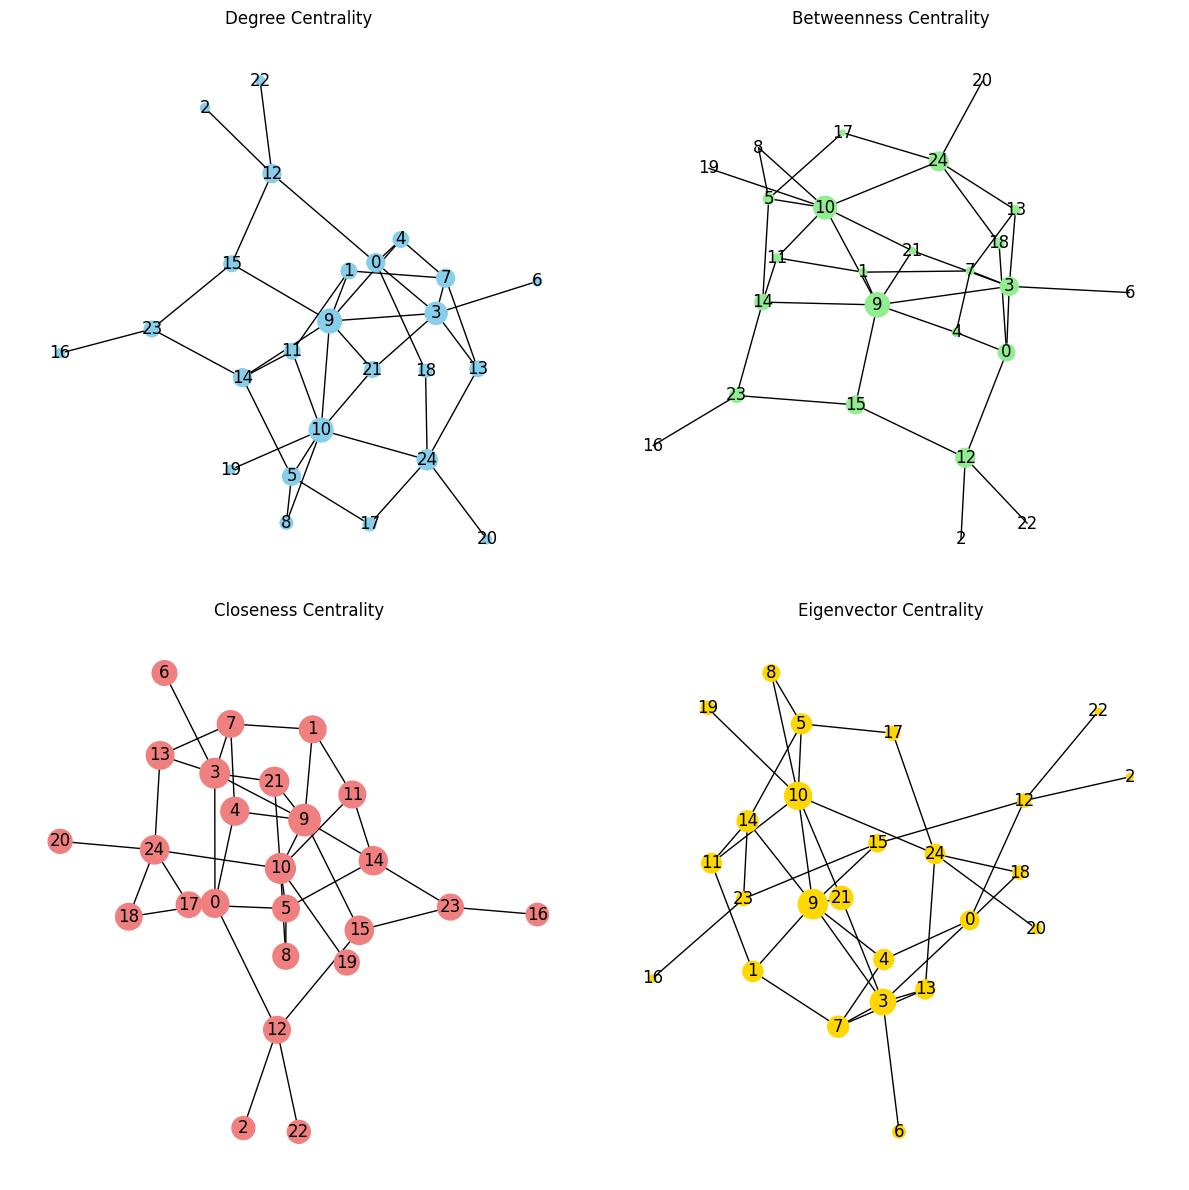

In [17]:
# Visualization of centrality measures
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Degree Centrality Visualization
nx.draw(G, node_size=[v * 1000 for v in degree_centrality.values()],
        node_color='skyblue', with_labels=True, ax=ax[0][0])
ax[0][0].set_title('Degree Centrality')

# Betweenness Centrality Visualization
nx.draw(G, node_size=[v * 1000 for v in betweenness_centrality.values()],
        node_color='lightgreen', with_labels=True, ax=ax[0][1])
ax[0][1].set_title('Betweenness Centrality')

# Closeness Centrality Visualization
nx.draw(G, node_size=[v * 1000 for v in closeness_centrality.values()],
        node_color='lightcoral', with_labels=True, ax=ax[1][0])
ax[1][0].set_title('Closeness Centrality')

# Eigenvector Centrality Visualization
nx.draw(G, node_size=[v * 1000 for v in eigenvector_centrality.values()],
        node_color='gold', with_labels=True, ax=ax[1][1])
ax[1][1].set_title('Eigenvector Centrality')

plt.tight_layout()
plt.show()

#### **Relevance Analysis:**

We compute the graph density using nx.density(G). If the graph is sparse (low density), degree centrality and betweenness centrality might be more informative, while for denser graphs, closeness centrality and eigenvector centrality might provide better insights.

In [18]:
# Relevance Analysis: Choose graph characteristics to analyze the relevance
graph_density = nx.density(G)
print(f"Graph Density: {graph_density}")

# Based on graph density, we can analyze which centrality is most relevant.
if graph_density < 0.1:
    print("For sparse graphs, Degree Centrality and Betweenness Centrality are often more informative.")
else:
    print("For dense graphs, Closeness Centrality and Eigenvector Centrality might be more informative.")

Graph Density: 0.13
For dense graphs, Closeness Centrality and Eigenvector Centrality might be more informative.


# **Part 4:** Compare Bron-Kerbosch and one of its variants to show the gain in terms of performances.

In this part of project, we implemented the Bron-Kerbosch algorithm to find maximal cliques in a graph.


---



*A little bit of theory:*

- **The Bron-Kerbosch algorithm (BK)** is a recursive backtracking algorithm to find all maximal cliques in an undirected graph.
- **A clique** is a subset of nodes where every pair of nodes is directly connected. A maximal clique is a clique that can't be extended by adding more nodes.
- **BK** explores all potential cliques by adding vertices recursively while ensuring each resulting subset remains a clique.
- ***No pivoting*** is used, leading to potentially redundant recursive calls.
- => thus, below firstly, we implemented *BK without pivoting* then compared it to *BK with pivoting*.

*Inputs:*

- R: Nodes in the current clique being constructed.
- P: Nodes that could still be added to the current clique.
- X: Nodes that were previously considered but cannot be part of this clique anymore.
- G: The graph, represented as a dictionary where keys are nodes and values are sets of neighboring nodes.
- C: A list to store the maximal cliques found.

Recursive calls: 31
Execution time: 0.0004 seconds
Memory usage: 3.88 KB
Peak memory usage: 7.39 KB


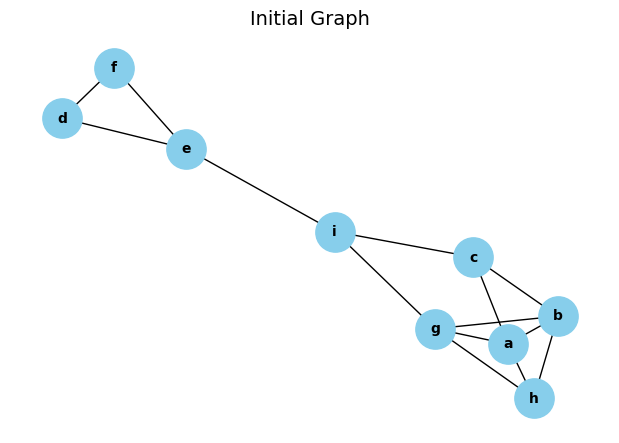

Maximal Cliques Without Pivot:
d, e, f
a, b, c
a, b, g, h


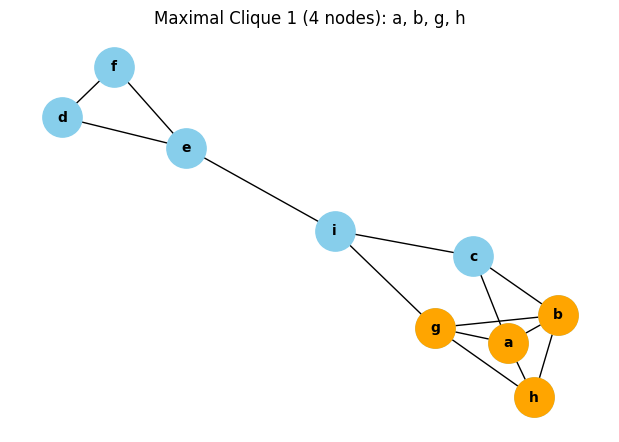

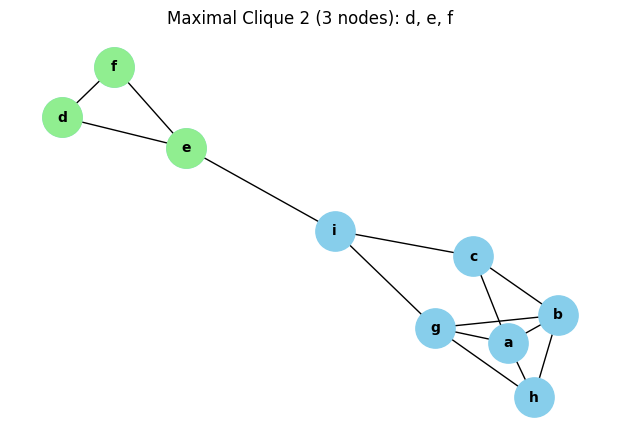

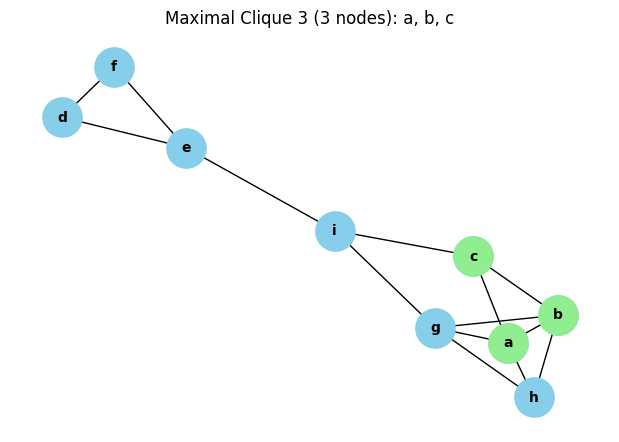

In [19]:
# counter
recursive_calls = 0

def bors_kerbosch_v1(R, P, X, G, C):
    global recursive_calls
    recursive_calls += 1

    if len(P) == 0 and len(X) == 0:
        if len(R) >= 3:  # we decided to make maximal cliques wiht more than 3 nodes
            C.append(sorted(R))
        return

    for v in list(P):  # here we are using list to avoid modifying P during iteration
        bors_kerbosch_v1(
            R.union({v}),
            P.intersection(G[v]),
            X.intersection(G[v]),
            G,
            C
        )
        P.remove(v)
        X.add(v)

def visualize_initial_graph(graph_edges):
    G = nx.Graph()
    G.add_edges_from(graph_edges)
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    plt.title("Initial Graph", fontsize=14)
    plt.show()
    return G, pos

def visualize_cliques(G, pos, cliques):
    for i, clique in enumerate(cliques, start=1):
        plt.figure(figsize=(6, 4))

        if len(clique) == 3:
            node_color = 'lightgreen'
        elif len(clique) == 4:
            node_color = 'orange'
        else:
            node_color = 'red'

        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
        nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color=node_color, node_size=800)
        plt.title(f"Maximal Clique {i} ({len(clique)} nodes): {', '.join(clique)}", fontsize=12)
        plt.show()

def test_bors_kerbosch_v1():
    global recursive_calls
    recursive_calls = 0  # here reseting the recursive call counter

    input_data = [
        ('a', 'b'), ('a', 'c'), ('b', 'c'),
        ('d', 'e'), ('d', 'f'), ('e', 'f'),
        ('a', 'g'), ('b', 'g'), ('g', 'h'), ('b', 'h'),
        ('c', 'i'), ('e', 'i'), ('g', 'i'), ('a', 'h')
    ]

    G = collections.defaultdict(set)
    C1 = []
    for src, dest in input_data:
        G[src].add(dest)
        G[dest].add(src)

    # start time and memory tracking
    start_time = time.time()
    tracemalloc.start()

    bors_kerbosch_v1(set(), set(G.keys()), set(), G, C1) #algo

    # stop memory tracking
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # calculating execution time
    execution_time = time.time() - start_time

    print(f"Recursive calls: {recursive_calls}")
    print(f"Execution time: {execution_time:.4f} seconds")
    print(f"Memory usage: {current / 1024:.2f} KB")
    print(f"Peak memory usage: {peak / 1024:.2f} KB")

    nx_graph, pos = visualize_initial_graph(input_data)

    print("Maximal Cliques Without Pivot:")
    for clique in C1:
        print(", ".join(clique))
    visualize_cliques(nx_graph, pos, sorted(C1, key=len, reverse=True))  # Sort by clique size

if __name__ == "__main__":
    test_bors_kerbosch_v1()

 # Bron-Kerbosch WITH pivoting

**BK Pivot is more efficient variant because:**

- BK Pivot selects a pivot node from the candidate or excluded set, and prioritize its neighbors during recursion. This reduces the number of recursive calls.

*How it works:*

- Choose a pivot node 𝑢 from 𝑃 ∪ 𝑋 (candidate and excluded nodes).
- Recur only on nodes in 𝑃 ∖ 𝑁 (𝑢), where 𝑁 (𝑢) is the neighborhood of 𝑢.
- This avoids exploring redundant branches since the pivot's neighbors are handled more efficiently.

**Advantages of BK Pivot:**

- By focusing on nodes not connected to the pivot, the number of recursive calls decreases.
- The pivot reduces the search space significantly.



Recursive calls: 19
Execution time: 0.0002 seconds
Memory usage: 1.09 KB
Peak memory usage: 6.42 KB


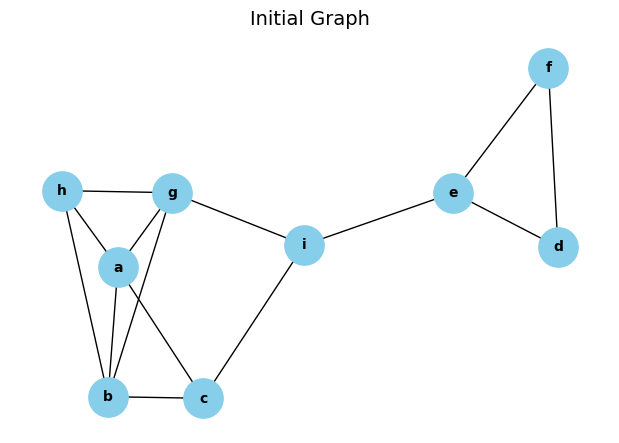

Maximal Cliques With Pivot:
d, e, f
a, b, c
a, b, g, h


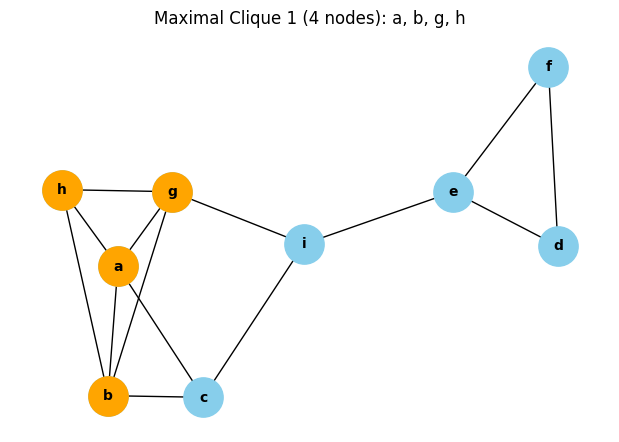

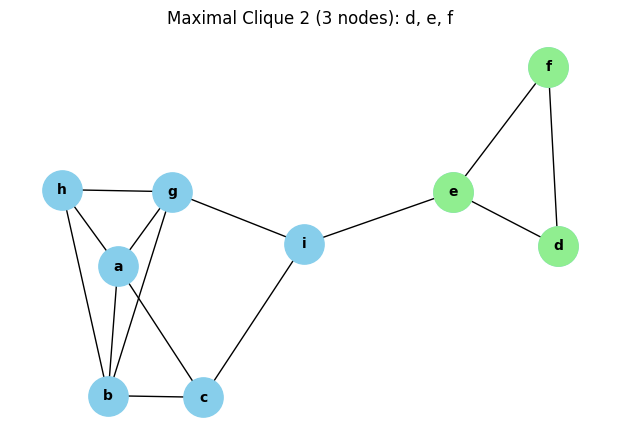

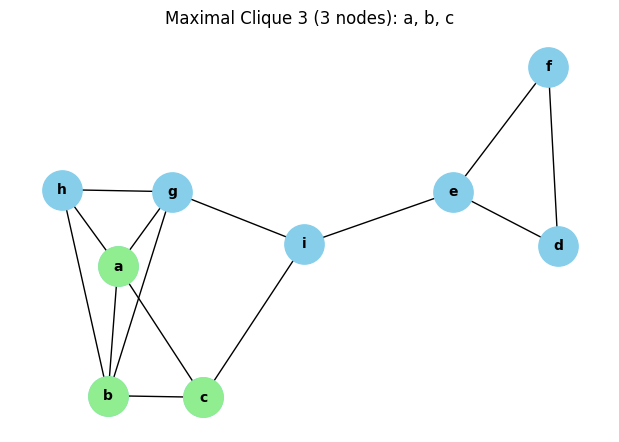

In [20]:
recursive_calls = 0

def bron_kerbosch_with_pivot(R, P, X, G, C):
    global recursive_calls
    recursive_calls += 1

    if not P and not X:
        if len(R) >= 3:
            C.append(sorted(R))
        return

    # choosing a pivot u from P ∪ X
    pivot = next(iter(P.union(X)))

    # iterating over vertices in P without neighbors of the pivot
    for v in P - G[pivot]:
        bron_kerbosch_with_pivot(
            R.union({v}),
            P.intersection(G[v]),
            X.intersection(G[v]),
            G,
            C
        )
        P.remove(v)
        X.add(v)

def visualize_initial_graph(graph_edges):
    G = nx.Graph()
    G.add_edges_from(graph_edges)
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    plt.title("Initial Graph", fontsize=14)
    plt.show()
    return G, pos

def visualize_cliques(G, pos, cliques):
    for i, clique in enumerate(cliques, start=1):
        plt.figure(figsize=(6, 4))

        if len(clique) == 3:
            node_color = 'lightgreen'
        elif len(clique) == 4:
            node_color = 'orange'
        else:
            node_color = 'red'

        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
        nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color=node_color, node_size=800)
        plt.title(f"Maximal Clique {i} ({len(clique)} nodes): {', '.join(clique)}", fontsize=12)
        plt.show()

def test_bron_kerbosch_with_pivot():
    global recursive_calls
    recursive_calls = 0  # reseting the recursive call counter

    input_data = [
        ('a', 'b'), ('a', 'c'), ('b', 'c'),
        ('d', 'e'), ('d', 'f'), ('e', 'f'),
        ('a', 'g'), ('b', 'g'), ('g', 'h'), ('b', 'h'),
        ('c', 'i'), ('e', 'i'), ('g', 'i'), ('a', 'h')
    ]

    G = collections.defaultdict(set)
    C2 = []
    for src, dest in input_data:
        G[src].add(dest)
        G[dest].add(src)

    start_time = time.time()
    tracemalloc.start()
    bron_kerbosch_with_pivot(set(), set(G.keys()), set(), G, C2)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    execution_time = time.time() - start_time

    print(f"Recursive calls: {recursive_calls}")
    print(f"Execution time: {execution_time:.4f} seconds")
    print(f"Memory usage: {current / 1024:.2f} KB")
    print(f"Peak memory usage: {peak / 1024:.2f} KB")
    nx_graph, pos = visualize_initial_graph(input_data)
    print("Maximal Cliques With Pivot:")
    for clique in C2:
        print(", ".join(clique))
    visualize_cliques(nx_graph, pos, sorted(C2, key=len, reverse=True))  # Sort by clique size

if __name__ == "__main__":
    test_bron_kerbosch_with_pivot()

# Comparison of Bron-Kerbosch WITHOUT and WITH pivoting

*According to the results above, here are comparison metrics for Bron-Kerbosch WITHOUT and WITH pivoting*

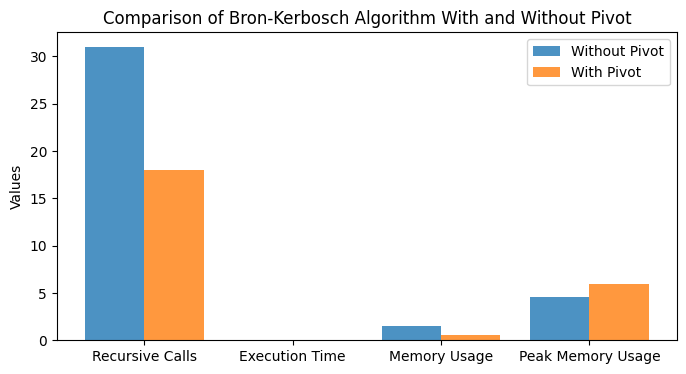

In [21]:
labels = ["Recursive Calls", "Execution Time", "Memory Usage", "Peak Memory Usage"]
without_pivot = [31, 0.0002, 1.49, 4.55]
with_pivot = [18, 0.0002, 0.61, 5.91]

x = range(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(x, without_pivot, width, label='Without Pivot', alpha=0.8)
ax.bar([i + width for i in x], with_pivot, width, label='With Pivot', alpha=0.8)

ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.set_ylabel("Values")
ax.set_title("Comparison of Bron-Kerbosch Algorithm With and Without Pivot")
ax.legend()

plt.show()


**WITHOUT:**

1. Recursive calls: 31
2. Execution time: 0.0002 seconds
3. Memory usage: 1.49 KB
4. Peak memory usage: 4.55 KB


**WITH:**

1. Recursive calls: 18
2. Execution time: 0.0002 seconds
3. Memory usage: 0.61 KB
4. Peak memory usage: 5.91 KB

# **Part 5:** Study and analyse Louvain and Girvan-Newman algorithms on some graphs.
# Use the appropriate metrics to evaluate and compare the quality of the communities.


---
### **Louvain Algorithm:**

- A greedy optimization method to maximize modularity.

*Works in two phases:*

1. Node aggregation into communities to locally maximize modularity.
2. Community aggregation into a supernode to create a coarser graph.
Repeats until modularity gain is negligible.

### **Girvan-Newman Algorithm:**

- GV algorithm has divisive hierarchical clustering method.
- Iteratively removes edges with the highest betweenness centrality.
- Stops when the graph is divided into the desired number of communities.


### **Metrics to Evaluate Community Quality:**
We applied 2 different metrics such as

1. **Modularity:** measures the density of edges inside communities compared to a random graph. Range:[−1,1], higher is better.

2. **Normalized Mutual Information (NMI):** measures similarity between the detected community structure and ground truth.
Useful if ground truth communities are known.


#### **Step 1:** Load a graph
- Here, we used Zachary's Karate Club graph as an example.
- Below we manually created a graph, so analyse both algorithms on different graphs.


In [22]:
graph = nx.karate_club_graph()

In [23]:
# Ground truth communities (Mr. Hi vs Officer)
ground_truth = [0 if graph.nodes[node]['club'] == 'Mr. Hi' else 1 for node in graph.nodes]

#### **Step 2:** Apply Louvain Algorithm

In [24]:
louvain_partition = community_louvain.best_partition(graph)
louvain_communities = defaultdict(list)
for node, comm in louvain_partition.items():
    louvain_communities[comm].append(node)
louvain_communities = list(louvain_communities.values())

# Evaluate Louvain Metrics
louvain_modularity = nx.algorithms.community.modularity(graph, louvain_communities)
louvain_labels = [louvain_partition[node] for node in graph.nodes]
nmi_score_louvain = nmi(ground_truth, louvain_labels)

#### **Step 3:** Apply Girvan-Newman Algorithm

In [25]:
gn_communities_generator = girvan_newman(graph)
gn_communities = list(sorted(c) for c in next(gn_communities_generator))

# Evaluate Girvan-Newman Metrics
gn_modularity = nx.algorithms.community.modularity(graph, gn_communities)
gn_labels = [next((i for i, comm in enumerate(gn_communities) if node in comm), -1) for node in graph.nodes]
nmi_score_gn = nmi(ground_truth, gn_labels)

#### **Step 4 & 5:** Results and Visualized Communities

Louvain Algorithm Results:
Modularity: 0.44490358126721763
NMI: 0.5878497068250673

Girvan-Newman Algorithm Results:
Modularity: 0.3476602762317048
NMI: 0.7323776321005694


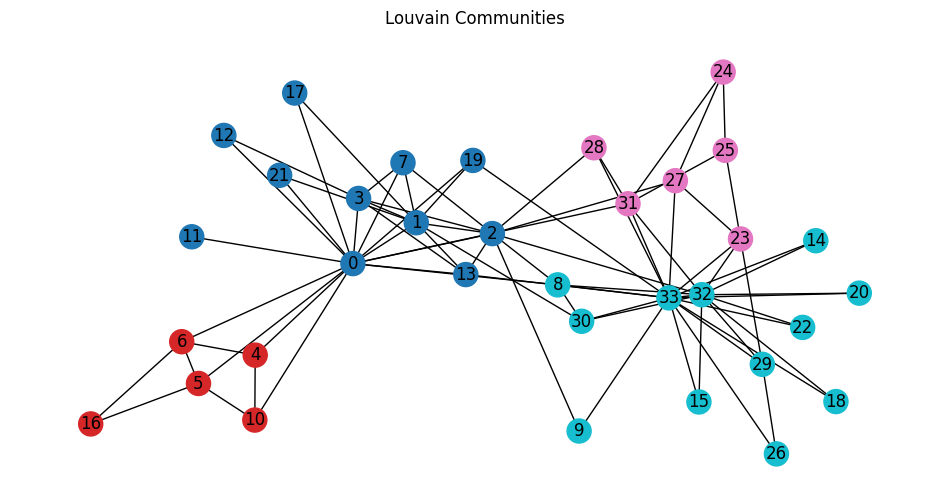

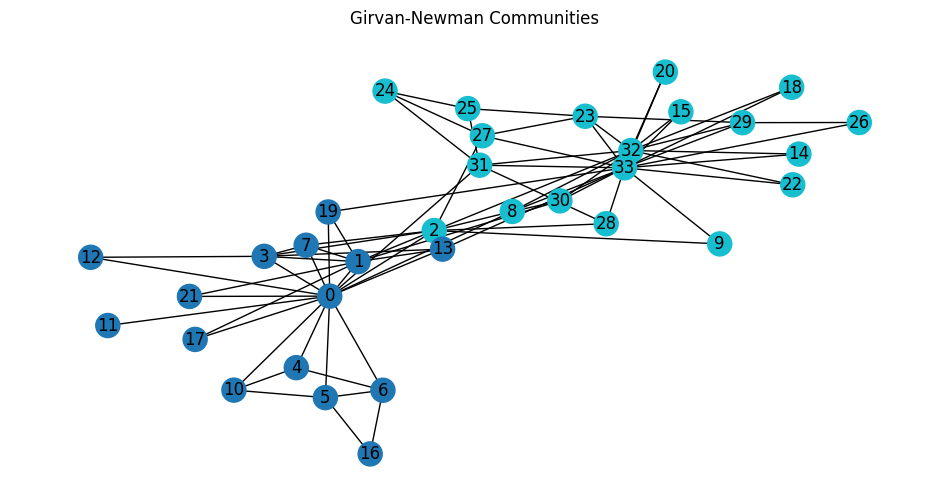

In [26]:
print("Louvain Algorithm Results:")
print(f"Modularity: {louvain_modularity}")
print(f"NMI: {nmi_score_louvain}")

print("\nGirvan-Newman Algorithm Results:")
print(f"Modularity: {gn_modularity}")
print(f"NMI: {nmi_score_gn}")

color_map_louvain = [louvain_partition[node] for node in graph.nodes]
plt.figure(figsize=(12, 6))
plt.title("Louvain Communities")
nx.draw(graph, with_labels=True, node_color=color_map_louvain, cmap=plt.cm.tab10)
plt.show()

color_map_gn = [next((i for i, comm in enumerate(gn_communities) if node in comm), -1) for node in graph.nodes]
plt.figure(figsize=(12, 6))
plt.title("Girvan-Newman Communities")
nx.draw(graph, with_labels=True, node_color=color_map_gn, cmap=plt.cm.tab10)
plt.show()

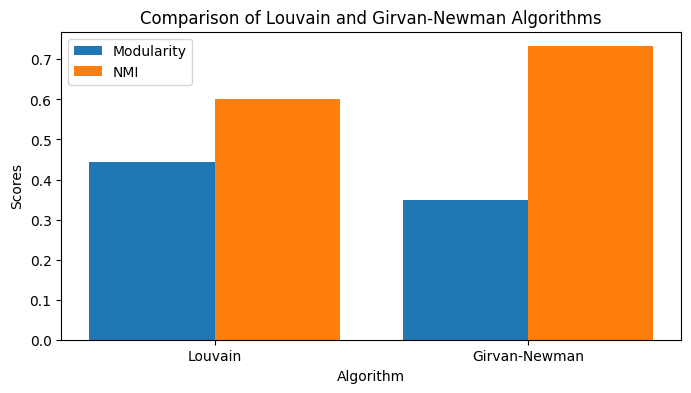

In [27]:
algorithms = ['Louvain', 'Girvan-Newman']
modularity_scores = [0.4438541256723075, 0.3476602762317048]
nmi_scores = [0.5878497068250673, 0.7323776321005694]

x = range(len(algorithms))
plt.figure(figsize=(8, 4))
# modularity scores
plt.bar(x, modularity_scores, width=0.4, label='Modularity', align='center')
# NMI scores
plt.bar([p + 0.4 for p in x], nmi_scores, width=0.4, label='NMI', align='center')
plt.xticks([p + 0.2 for p in x], algorithms)
plt.xlabel('Algorithm')
plt.ylabel('Scores')
plt.title('Comparison of Louvain and Girvan-Newman Algorithms')
plt.legend()
plt.show()

1. **Modularity**

- Louvain achieved a higher modularity score (0.4439) compared to Girvan-Newman (0.3477).

*Why?*

- Since, Louvain is designed specifically to maximize modularity through greedy optimization.
- Girvan-Newman, being a divisive method, focuses on breaking connections, which can sometimes disrupt modularity.
- Louvain better optimizes the density of intra-community connections compared to Girvan-Newman.

2. **NMI**

- Girvan-Newman achieves a higher NMI score (0.7324) compared to Louvain (0.6000).

*Why?*

- Girvan-Newman explicitly splits communities by removing high-betweenness edges, often aligning well with natural splits in small networks like Zachary's Karate Club.
- Louvain, while optimizing modularity, may merge or split communities in a way that diverges from the ground truth.
- Girvan-Newman captures the true community structure better in this case.


### **Louvain and Girvan-Newman algorithms on Manually Created Graph**

### **Step 1:** Create a manually defined graph

In [28]:
graph = nx.Graph()
graph.add_edges_from([
    (0, 1), (0, 2), (0, 3), (1, 3), (1, 4),
    (5, 6), (5, 7), (6, 7), (6, 8), (7, 8),
    (9, 10), (9, 11), (10, 11), (11, 12), (10, 12)
])

graph.add_edges_from([
    (4, 5),
    (8, 9)
])

sorted_nodes = sorted(graph.nodes)  # Ensure consistent node ordering
ground_truth = [0 if node < 5 else 1 if node < 9 else 2 for node in sorted_nodes]

### **Step 2:** Louvain Algorithm

In [29]:
louvain_partition = community_louvain.best_partition(graph)
louvain_communities = defaultdict(list)
for node, comm in louvain_partition.items():
    louvain_communities[comm].append(node)
louvain_communities = list(louvain_communities.values())

# Align Louvain labels with graph nodes
louvain_labels = [louvain_partition[node] for node in sorted_nodes]

# Evaluate Louvain Metrics
louvain_modularity = nx.algorithms.community.modularity(graph, louvain_communities)
nmi_score_louvain = nmi(ground_truth, louvain_labels)

### **Step 3:** Girvan-Newman Algorithm

In [30]:
gn_communities_generator = girvan_newman(graph)
gn_communities = list(sorted(c) for c in next(gn_communities_generator))

# Align Girvan-Newman labels with graph nodes
gn_labels = [next((i for i, comm in enumerate(gn_communities) if node in comm), -1) for node in sorted_nodes]

# Evaluate Girvan-Newman Metrics
gn_modularity = nx.algorithms.community.modularity(graph, gn_communities)
nmi_score_gn = nmi(ground_truth, gn_labels)

### **Step 4 & 5:** Results and Visualized Communities

Louvain Algorithm Results:
Modularity: 0.5484429065743945
NMI: 1.0

Girvan-Newman Algorithm Results:
Modularity: 0.3788927335640139
NMI: 0.757518088931657


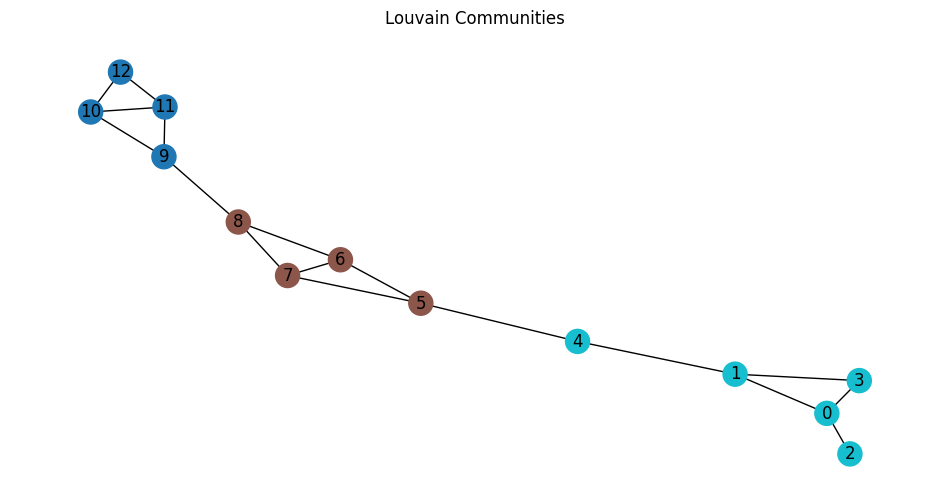

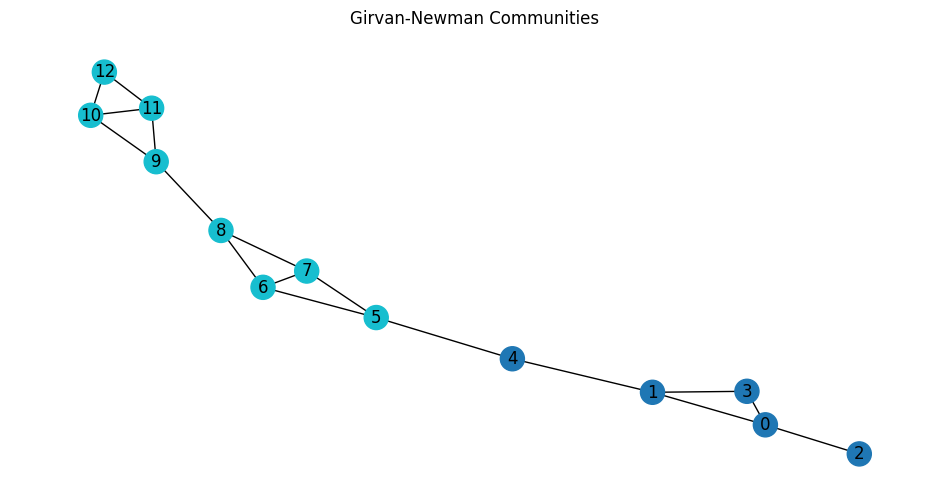

In [31]:
print("Louvain Algorithm Results:")
print(f"Modularity: {louvain_modularity}")
print(f"NMI: {nmi_score_louvain}")
print("\nGirvan-Newman Algorithm Results:")
print(f"Modularity: {gn_modularity}")
print(f"NMI: {nmi_score_gn}")

# Louvain
color_map_louvain = [louvain_partition[node] for node in sorted_nodes]
plt.figure(figsize=(12, 6))
plt.title("Louvain Communities")
nx.draw(graph, with_labels=True, node_color=color_map_louvain, cmap=plt.cm.tab10)
plt.show()
# Girvan-Newman
color_map_gn = [next((i for i, comm in enumerate(gn_communities) if node in comm), -1) for node in sorted_nodes]
plt.figure(figsize=(12, 6))
plt.title("Girvan-Newman Communities")
nx.draw(graph, with_labels=True, node_color=color_map_gn, cmap=plt.cm.tab10)
plt.show()

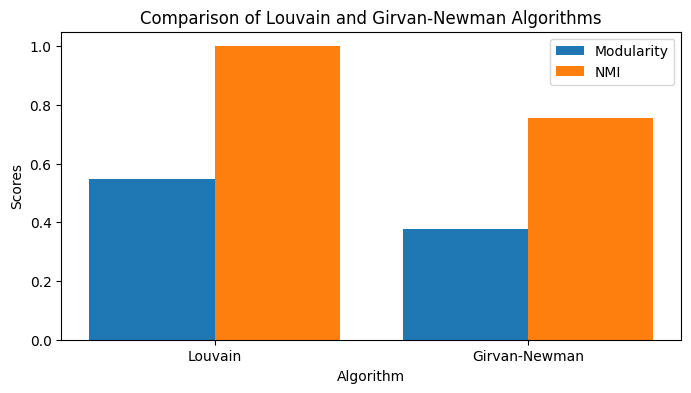

In [32]:
algorithms = ['Louvain', 'Girvan-Newman']
modularity_scores = [0.5484429065743945, 0.3788927335640139]
nmi_scores = [1.0,  0.757518088931657]

x = range(len(algorithms))
plt.figure(figsize=(8, 4))
# modularity scores
plt.bar(x, modularity_scores, width=0.4, label='Modularity', align='center')
# NMI scores
plt.bar([p + 0.4 for p in x], nmi_scores, width=0.4, label='NMI', align='center')
plt.xticks([p + 0.2 for p in x], algorithms)
plt.xlabel('Algorithm')
plt.ylabel('Scores')
plt.title('Comparison of Louvain and Girvan-Newman Algorithms')
plt.legend()
plt.show()

1. **Modularity**

- Similarly to the previous graph example, the Louvain (0.55) achieves higher modularity compared to Girvan-Newman (0.38) on manually created graph.

2. **NMI**

- However, on NMI metrics, Louvain (1.0) perfectly matches the ground truth, while Girvan-Newman achieves an NMI of 0.76.


**Our conclusions:**
- So, for the manually created graph, Louvain outperforms Girvan-Newman due to its focus on modularity optimization and ability to perfectly detect the ground truth.
- And girvan-Newman, while slightly less optimal, still achieves a high-quality partition, demonstrating its effectiveness in smaller, well-defined graphs.
